Enter series name: The Office
Enter by weekday or by time of the day: time of the day


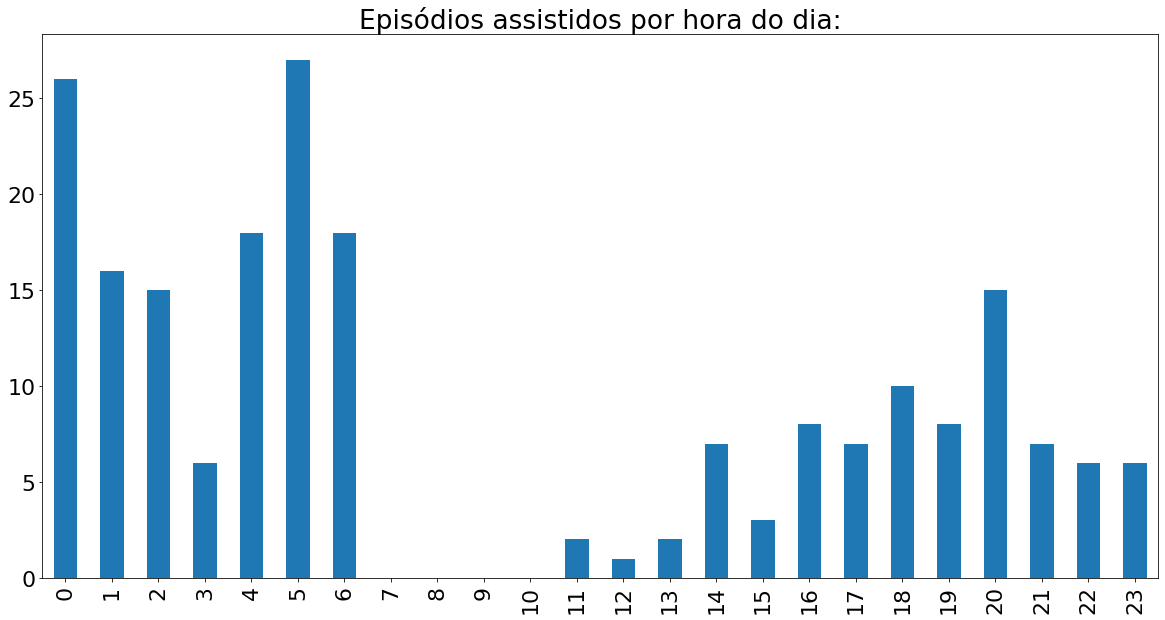

In [22]:
import pandas as pd
import matplotlib

##acessar 'https://www.netflix.com/account/getmyinfo' e extrair seus dados, unzipa e procure pela pasta
##'Content Interaction', copie o arquivo excell 'ViewingActivity.csv' e cole na pasta que Anaconda foi
##instalada.

#pede o nm ao user
nm_serie = input("Enter series name: ")

##colocando o historico em um dataframe pandas
df = pd.read_csv('ViewingActivity.csv')

##converter o tempo de string para datetime
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

##transformar a coluna Start Time no index do dataframe
df = df.set_index('Start Time')

##formatar a timezone para Brasi/Sao_Paulo
df.index = df.index.tz_convert('America/Sao_Paulo')

##reseta o index, a Start Time volta a ser uma coluna
df = df.reset_index()

##converter o tempo de string para timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])

##cria um dataframe novo com apenas as linhas que contem 'The Office (U.S.)'
serie = df[df['Title'].str.contains(nm_serie, regex=False)]

##filtrar os trailers 
serie = serie[(serie['Duration'] > '0 days 00:03:00')]

##tempo que assistiu
serie['Duration'].sum()

##cria novas colunas no novo df para o dia da semana e a hora
serie['weekday'] = serie['Start Time'].dt.weekday
serie['hour'] = serie['Start Time'].dt.hour

%matplotlib inline

#pede o tipo de graf ao user
graf_type = input("Enter by weekday or by time of the day: ")

#if clause dependete do tipo de graf
if graf_type == 'by weekday' or 'weekday':

    ##dias da semana
    ##organiza os dias da semana
    serie['weekday'] = pd.Categorical(serie['weekday'], categories=
        [0,1,2,3,4,5,6],
        ordered=True)

    ##conta o numero de linhas em cada dia da semana e armazena a variaveis na serie_by_day
    serie_by_day = serie['weekday'].value_counts()

    ##filtra o index na ordem correta dos dias da semana
    serie_by_day = serie_by_day.sort_index()

    ##aumenta a fonte
    matplotlib.rcParams.update({'font.size': 22})

    ##plota o serie_by_day como um graf de barras
    serie_by_day.plot(kind='bar', figsize=(20,10), title='Episódios assistidos por dia da semana:')
        
if graf_type == 'by time of the day' or 'time of the day':

    ##horas do dia
    ##define a ordem para que os dados sejam plotados na ordem 0-23
    serie['hour'] = pd.Categorical(serie['hour'], categories=
        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
        ordered=True)

    ##conta o numero de linhas em cada hora e armazena as variaveis na serie_by_hour
    serie_by_hour =serie['hour'].value_counts()

    ##organiza o index por ordem categorica 0 - 1 - 2
    serie_by_hour = serie_by_hour.sort_index()

    ##plota o serie_by_hour como um graf de barras
    serie_by_hour.plot(kind='bar', figsize=(20,10), title='Episódios assistidos por hora do dia:')
